### Importación de datos



In [58]:
import pandas as pd

url = "https://raw.githubusercontent.com/mroma92/AluraStore/main/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/mroma92/AluraStore/main/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/mroma92/AluraStore/main/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/mroma92/AluraStore/main/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [59]:
#reviso que el período que deseo evaluar sea el mismo para las cuatro tiendas
tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], format='%d/%m/%Y')
tienda2['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y')
tienda3['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], format='%d/%m/%Y')
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y')

display(tienda['Fecha de Compra'].max())
display(tienda2['Fecha de Compra'].max())
display(tienda3['Fecha de Compra'].max())
display(tienda4['Fecha de Compra'].max())

Timestamp('2023-03-31 00:00:00')

Timestamp('2023-03-30 00:00:00')

Timestamp('2023-03-30 00:00:00')

Timestamp('2023-03-30 00:00:00')

In [60]:
display(tienda['Fecha de Compra'].min())
display(tienda2['Fecha de Compra'].min())
display(tienda3['Fecha de Compra'].min())
display(tienda4['Fecha de Compra'].min())

Timestamp('2020-01-01 00:00:00')

Timestamp('2020-01-01 00:00:00')

Timestamp('2020-01-01 00:00:00')

Timestamp('2020-01-01 00:00:00')

# 1. Análisis de facturación

In [61]:
#Al revisar se observa que solo la tienda 1 tiene un día de facturación más
#por lo que se crea un nuevo dataframe si ese día

tienda1 = tienda[tienda['Fecha de Compra'] != '2023-03-31']

In [62]:

fact_total1 = tienda1['Precio'].sum()
fact_total2 = tienda2['Precio'].sum()
fact_total3 = tienda3['Precio'].sum()
fact_total4 = tienda4['Precio'].sum()


print(f'El ingreso de la tienda 1 es de: ${fact_total1:,.2f}')
print(f'El ingreso de la tienda 2 es de: ${fact_total2:,.2f}')
print(f'El ingreso de la tienda 3 es de: ${fact_total3:,.2f}')
print(f'El ingreso de la tienda 4 es de: ${fact_total4:,.2f}')

El ingreso de la tienda 1 es de: $1,149,968,700.00
El ingreso de la tienda 2 es de: $1,116,343,500.00
El ingreso de la tienda 3 es de: $1,098,019,600.00
El ingreso de la tienda 4 es de: $1,038,375,700.00


# 2. Ventas por categoría

In [63]:
#concatenar tiendas
tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4])

In [64]:
from IPython.display import display
conteo_t1 = tienda1.groupby('Categoría del Producto').size().rename("Tienda 1")
conteo_t2 = tienda2.groupby('Categoría del Producto').size().rename("Tienda 2")
conteo_t3 = tienda3.groupby('Categoría del Producto').size().rename("Tienda 3")
conteo_t4 = tienda4.groupby('Categoría del Producto').size().rename("Tienda 4")


conteo_total = pd.concat([conteo_t1, conteo_t2, conteo_t3, conteo_t4], axis=1).fillna(0).astype(int)

print("\nVentas por categoria en cada tienda:")
display(conteo_total)

categorias_mas_populares = conteo_total.idxmax()

categorias_mas_populares_df = categorias_mas_populares.reset_index()
categorias_mas_populares_df.columns = ['Tienda', 'Categoría Más Popular']

print("\nCategorías más populares por tienda:")
display(categorias_mas_populares_df)


Ventas por categoria en cada tienda:


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,172,197,185,187
Muebles,463,442,499,480



Categorías más populares por tienda:


,Tienda,Categoría Más Popular
0,Tienda 1,Muebles
1,Tienda 2,Muebles
2,Tienda 3,Muebles
3,Tienda 4,Muebles


# 3. Calificación promedio de la tienda


In [83]:
calificacion_tienda1 = tienda1['Calificación'].mean()
calificacion_tienda2 = tienda2['Calificación'].mean()
calificacion_tienda3 = tienda3['Calificación'].mean()
calificacion_tienda4 = tienda4['Calificación'].mean()

print(f'La calificación promedio de la tienda 1 es de: {calificacion_tienda1:.2f}')
print(f'La calificación promedio de la tienda 2 es de: {calificacion_tienda2:.2f}')
print(f'La calificación promedio de la tienda 3 es de: {calificacion_tienda3:.2f}')
print(f'La calificación promedio de la tienda 4 es de: {calificacion_tienda4:.2f}')

La calificación promedio de la tienda 1 es de: 3.98
La calificación promedio de la tienda 2 es de: 4.04
La calificación promedio de la tienda 3 es de: 4.05
La calificación promedio de la tienda 4 es de: 4.00


# 4. Productos más y menos vendidos

In [66]:
# --- Tienda 1 ---
conteo_productos_tienda1 = tienda1['Producto'].value_counts()
mas_vendido_t1 = conteo_productos_tienda1.idxmax()
menos_vendido_t1 = conteo_productos_tienda1.idxmin()

print(f"--- Tienda 1 ---")
print(f"Producto más vendido: {mas_vendido_t1} ({conteo_productos_tienda1.max()} unidades)")
print(f"Producto menos vendido: {menos_vendido_t1} ({conteo_productos_tienda1.min()} unidades)")

# --- Tienda 2 ---
conteo_productos_tienda2 = tienda2['Producto'].value_counts()
mas_vendido_t2 = conteo_productos_tienda2.idxmax()
menos_vendido_t2 = conteo_productos_tienda2.idxmin()

print(f"--- Tienda 2 ---")
print(f"Producto más vendido: {mas_vendido_t2} ({conteo_productos_tienda2.max()} unidades)")
print(f"Producto menos vendido: {menos_vendido_t2} ({conteo_productos_tienda2.min()} unidades)")

# --- Tienda 3 ---
conteo_productos_tienda3 = tienda3['Producto'].value_counts()
mas_vendido_t3 = conteo_productos_tienda3.idxmax()
menos_vendido_t3 = conteo_productos_tienda3.idxmin()

print(f"--- Tienda 3 ---")
print(f"Producto más vendido: {mas_vendido_t3} ({conteo_productos_tienda3.max()} unidades)")
print(f"Producto menos vendido: {menos_vendido_t3} ({conteo_productos_tienda3.min()} unidades)")

# --- Tienda 4 ---
conteo_productos_tienda4 = tienda4['Producto'].value_counts()
mas_vendido_t4 = conteo_productos_tienda4.idxmax()
menos_vendido_t4 = conteo_productos_tienda4.idxmin()

print(f"--- Tienda 4 ---")
print(f"Producto más vendido: {mas_vendido_t4} ({conteo_productos_tienda4.max()} unidades)")
print(f"Producto menos vendido: {menos_vendido_t4} ({conteo_productos_tienda4.min()} unidades)")


--- Tienda 1 ---
Producto más vendido: Microondas (60 unidades)
Producto menos vendido: Auriculares con micrófono (33 unidades)
--- Tienda 2 ---
Producto más vendido: Iniciando en programación (65 unidades)
Producto menos vendido: Juego de mesa (32 unidades)
--- Tienda 3 ---
Producto más vendido: Kit de bancas (57 unidades)
Producto menos vendido: Bloques de construcción (35 unidades)
--- Tienda 4 ---
Producto más vendido: Cama box (62 unidades)
Producto menos vendido: Guitarra eléctrica (33 unidades)


# 5. Envío promedio por tienda

In [67]:

envio_tienda1 = tienda1['Costo de envío'].mean()
envio_tienda2 = tienda2['Costo de envío'].mean()
envio_tienda3 = tienda3['Costo de envío'].mean()
envio_tienda4 = tienda4['Costo de envío'].mean()

print(f'El envío promedio de la tienda 1 es de: ${envio_tienda1:,.2f}')
print(f'El envío promedio de la tienda 2 es de: ${envio_tienda2:,.2f}')
print(f'El envío promedio de la tienda 3 es de: ${envio_tienda3:,.2f}')
print(f'El envío promedio de la tienda 4 es de: ${envio_tienda4:,.2f}')


El envío promedio de la tienda 1 es de: $26,028.48
El envío promedio de la tienda 2 es de: $25,216.24
El envío promedio de la tienda 3 es de: $24,805.68
El envío promedio de la tienda 4 es de: $23,459.46


# 6. Gráficos

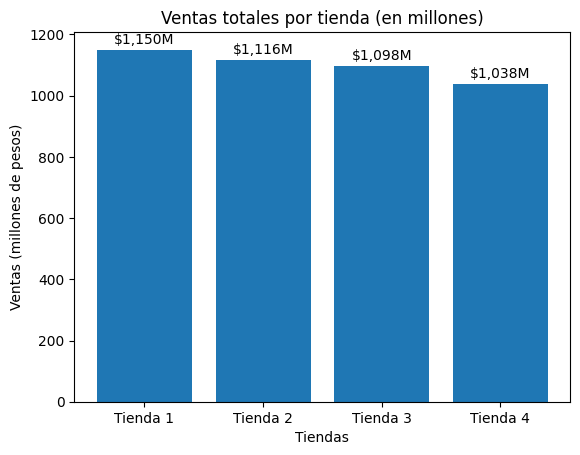

In [68]:
import matplotlib.pyplot as plt

tiendasx = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ventasy = [fact_total1, fact_total2, fact_total3, fact_total4]
ventasy_millones = [v / 1_000_000 for v in ventasy]


plt.bar(tiendasx, ventasy_millones)


plt.title('Ventas totales por tienda (en millones)')
plt.xlabel('Tiendas')
plt.ylabel('Ventas (millones de pesos)')

# Mostrar valores sobre cada barra
for i, valor in enumerate(ventasy_millones):
  plt.text(i, valor + 10, f"${valor:,.0f}M", ha='center', va='bottom', fontsize=10)

plt.show()

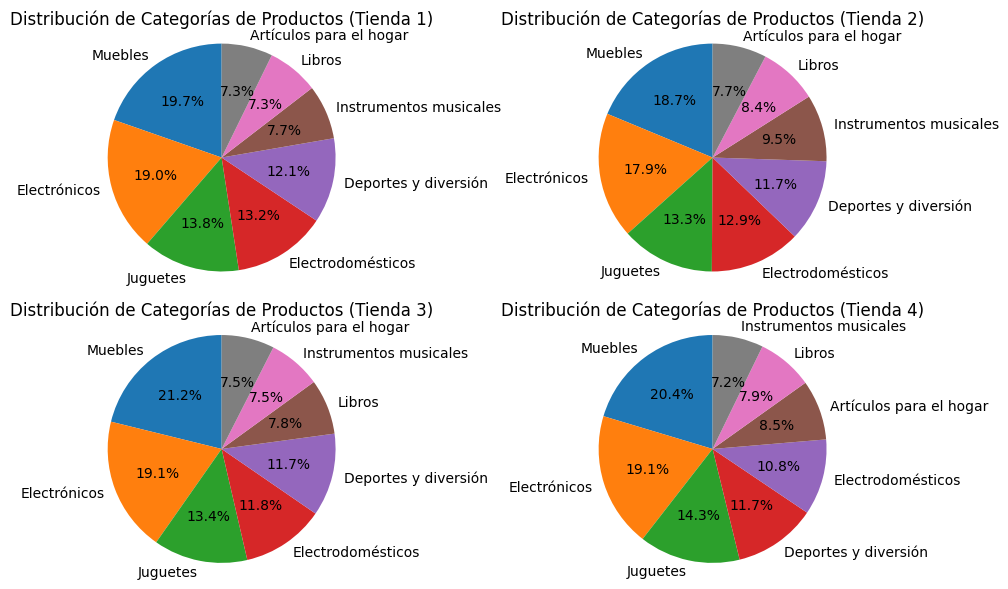

In [69]:
tiendas_bd = [tienda1, tienda2, tienda3, tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear una cuadrícula de 2x2 para los gráficos

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for i, tienda_df in enumerate(tiendas_bd):
    # Calcular la distribución de categorías de productos para la tienda actual
    categorias = tienda_df['Categoría del Producto'].value_counts().index
    cantidades = tienda_df['Categoría del Producto'].value_counts().values

    # Obtener el subplot correspondiente
    ax = axes[i // 2, i % 2]  # Calcular la posición del subplot en la cuadrícula

    # Crear el gráfico de pastel para la tienda actual
    ax.pie(cantidades, labels=categorias, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribución de Categorías de Productos ({tiendas[i]})')
    ax.axis('equal')  # Para que el gráfico sea circular

plt.tight_layout()  # Ajustar el espacio entre los subplots
plt.show()  # Mostrar el gráfico

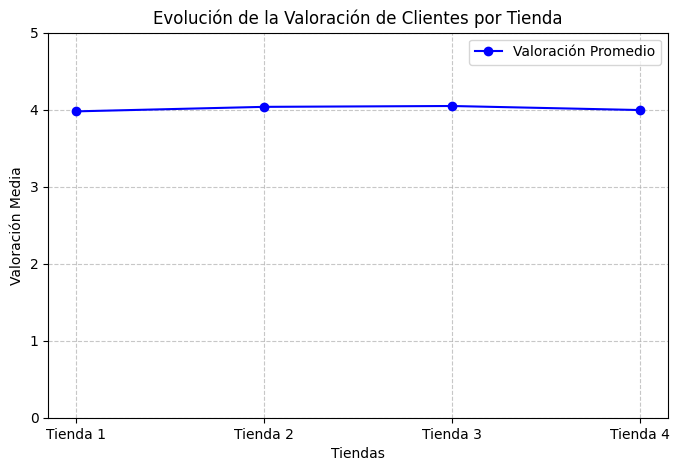

In [88]:
valoraciones = [calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4]

plt.figure(figsize=(8, 5))
plt.plot(tiendas, valoraciones, marker="o", linestyle="-", color="blue", label="Valoración Promedio")

plt.xlabel("Tiendas")
plt.ylabel("Valoración Media")
plt.title("Evolución de la Valoración de Clientes por Tienda")
plt.ylim(0, 5)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

plt.show()